In [807]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [808]:
# loading the data 
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [809]:
df.shape

(7043, 21)

In [810]:
df.info()
# i don't see any missing rows here 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [811]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [812]:
#  hmm lets continue , column wise data analysis 
i = 1
for col in df.columns:
    print(f"\n {i}. Column: {col}")
    print(df[col].value_counts())
    i+=1


 1. Column: customerID
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

 2. Column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

 3. Column: SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

 4. Column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

 5. Column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

 6. Column: tenure
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

 7. Column: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

 8. Column: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

 9. Colu

In [813]:
#  well i can see no-internet service as a category at may features , let make a seperate column for that
df['Internet service'] = ~(df[['StreamingMovies']]=='No internet service').all(axis=1)
df['Internet service'] = df['Internet service'].astype(int)

In [814]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Internet service
6874,4926-UMJZD,Female,0,Yes,No,31,Yes,No,DSL,No,...,Yes,No,No,Month-to-month,Yes,Mailed check,49.20,1498.55,No,1
2755,5468-BPMMO,Male,0,Yes,No,46,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.60,851.2,No,0
3959,8788-DOXSU,Male,0,No,No,59,Yes,No,DSL,No,...,No,No,Yes,One year,Yes,Bank transfer (automatic),61.35,3645.5,No,1
3861,0479-HMSWA,Female,0,No,Yes,26,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Two year,Yes,Electronic check,105.45,2715.3,No,1
747,3966-HRMZA,Female,1,No,No,3,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,No,Mailed check,75.05,202.9,No,1


In [815]:
df['Internet service'].value_counts()

Internet service
1    5517
0    1526
Name: count, dtype: int64

In [816]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,Internet service
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.783331
std,0.368612,24.559481,30.090047,0.412004
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,1.000000
50%,0.000000,29.000000,70.350000,1.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [817]:
df.drop(columns=['customerID'],inplace=True)

In [818]:
df.duplicated().sum()
# checking for duplicate rows 
# oho i found 22 !! lets dropthem 
df.drop_duplicates(inplace=True)
df.shape

(7021, 21)

In [819]:
df.nunique()


gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
Internet service       2
dtype: int64

In [820]:
df.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Internet service
6208,Male,0,Yes,No,61,Yes,Yes,DSL,Yes,Yes,...,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),80.8,4860.85,No,1


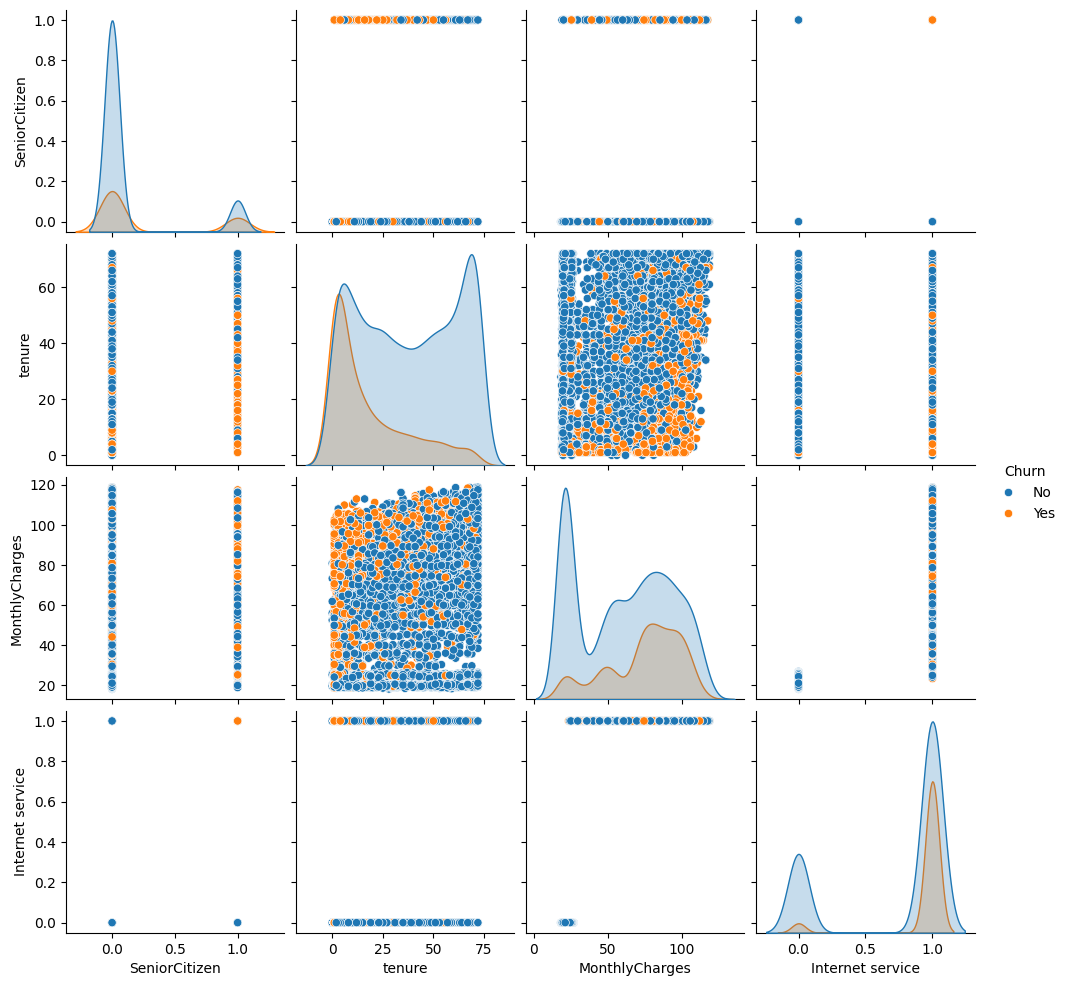

In [821]:
sns.pairplot(df,hue='Churn')

<Axes: >

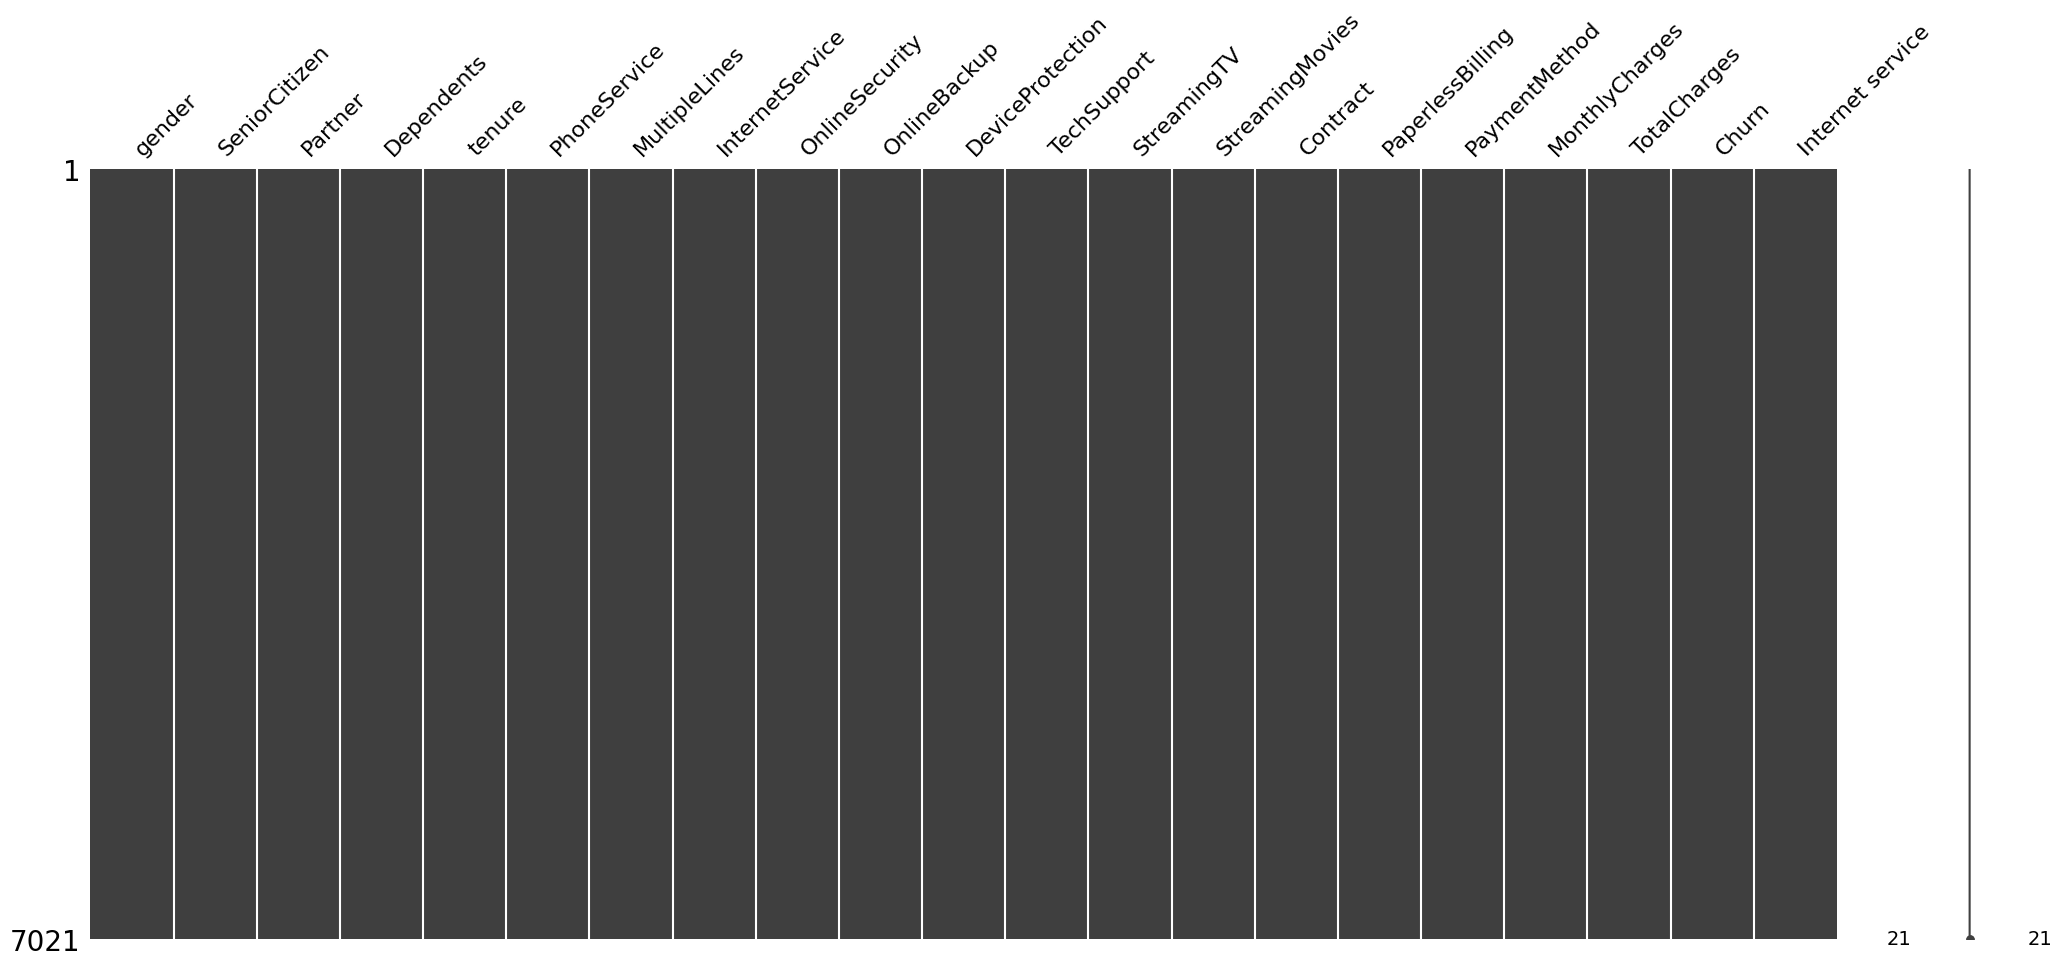

In [822]:
import missingno as msno
msno.matrix(df)
# there is no missing data we can find here 

In [823]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
Internet service      int64
dtype: object

In [824]:
# there are blank spaces in the totalCharges features
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Internet service     0
dtype: int64

In [825]:
df[df.isna().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Internet service
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,1
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,1
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,1
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,1


In [826]:
# the tenure for all these rows is 0 . lets see if there are other enteries with tenure = 0
df[df['tenure'] == 0]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Internet service
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,1
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,1
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,1
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,1


In [827]:
df.shape

(7021, 21)

In [828]:
# and these are the same enteries we get . i should drop them !!
df = df.dropna(axis=0)

In [829]:
df.shape

(7010, 21)

In [830]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:"No", 1:"Yes"})
df['Internet service'] = df['Internet service'].map({0:"No",1:"Yes"})
df.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Internet service
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,No,Yes


In [831]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388
std,24.520441,30.064769,2266.820832
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,408.312500
50%,29.000000,70.400000,1403.875000
75%,56.000000,89.900000,3807.837500
max,72.000000,118.750000,8684.800000


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

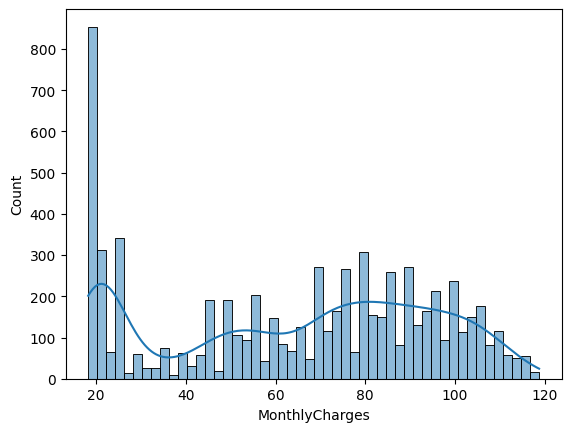

In [832]:
sns.histplot(df['MonthlyCharges'],kde=True,bins=50)

<Axes: xlabel='MonthlyCharges'>

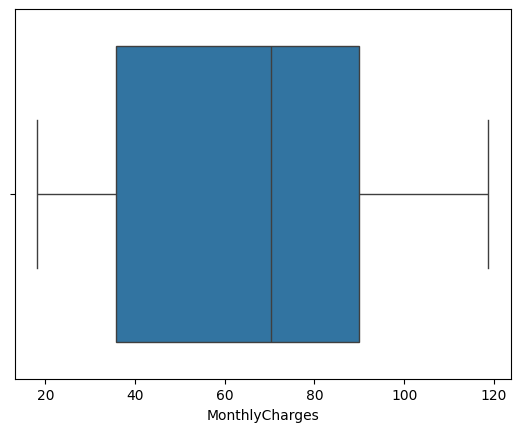

In [833]:
sns.boxplot(x=df['MonthlyCharges'])
# shows the median , spread and outliers 

<Axes: xlabel='Churn', ylabel='count'>

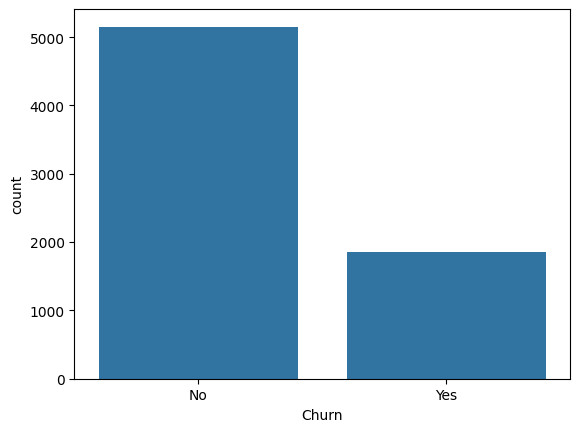

In [834]:
sns.countplot(x='Churn',data=df)
# count of categories

In [835]:
df['Contract'].value_counts()

Contract
Month-to-month    3853
Two year          1685
One year          1472
Name: count, dtype: int64

<Axes: xlabel='Contract', ylabel='MonthlyCharges'>

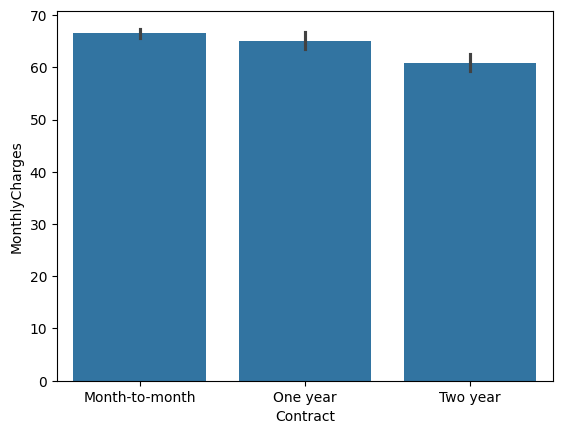

In [836]:
sns.barplot(x='Contract',y='MonthlyCharges',data=df)
# compare the averages across categories

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

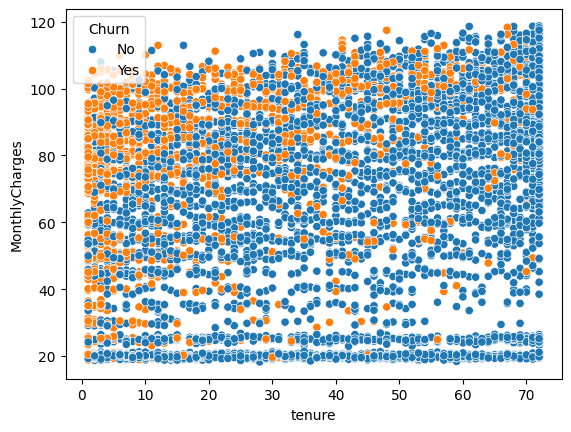

In [837]:
sns.scatterplot(x='tenure',y='MonthlyCharges',hue='Churn',data=df)

well we can infer from here that , the users with high high monthlyCharges and low tenure are likely to shift !!!


<Axes: >

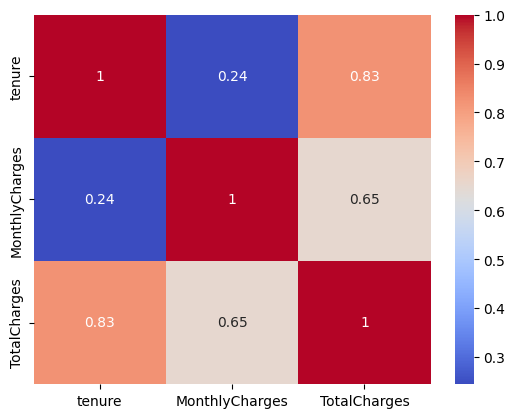

In [838]:
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,cmap='coolwarm')
# as gender column is string 

tenure and totalCharges have a strong positive correlation 

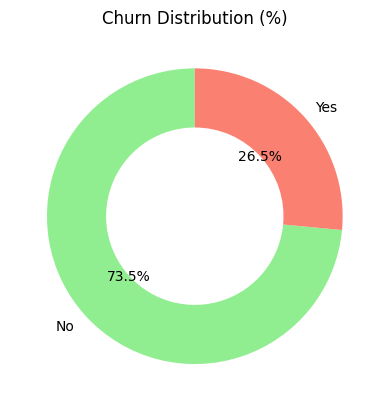

In [839]:
churn_counts = df['Churn'].value_counts(normalize=True) * 100
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'salmon'],
    wedgeprops={'width':0.4}
)
plt.title('Churn Distribution (%)')
plt.show()

we can see that 26.5 % of the customers switched !


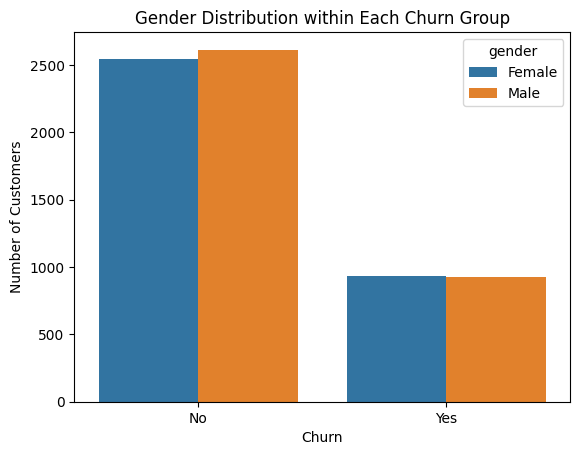

In [840]:
churn_counts = df['Churn'].value_counts(normalize=True) * 100
sns.countplot(x='Churn',hue='gender',data=df)
plt.title('Gender Distribution within Each Churn Group')
plt.ylabel('Number of Customers')
plt.show()

well the amount of churned customers based on gender is aproimatly same !!

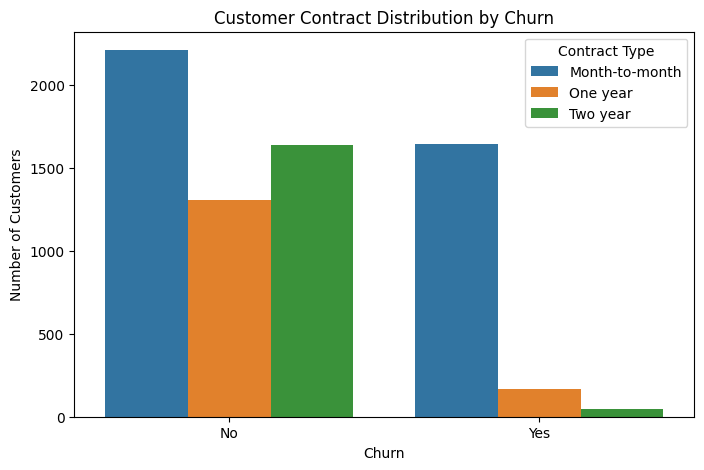

In [841]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', hue='Contract', data=df)
plt.title('Customer Contract Distribution by Churn')
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.legend(title='Contract Type')
plt.show()


HUGE ! most of the customers that left were Month-to-Month contract type

([<matplotlib.patches.Wedge at 0x24282f11450>,
 [Text(0.5404379090619372, 0.958084999594901, 'Electronic check'),
  Text(-1.0457042076532326, 0.3413249333059707, 'Mailed check'),
  Text(-0.5114306611844273, -0.9738781642487215, 'Bank transfer (automatic)'),
  Text(0.8541882375433825, -0.6930818529167607, 'Credit card (automatic)')],
 [Text(0.2947843140337839, 0.5225918179608551, '33.7%'),
  Text(-0.5703841132653995, 0.18617723634871125, '22.7%'),
  Text(-0.2789621788278694, -0.5312062714083935, '22.0%'),
  Text(0.4659208568418449, -0.3780446470455058, '21.7%')])

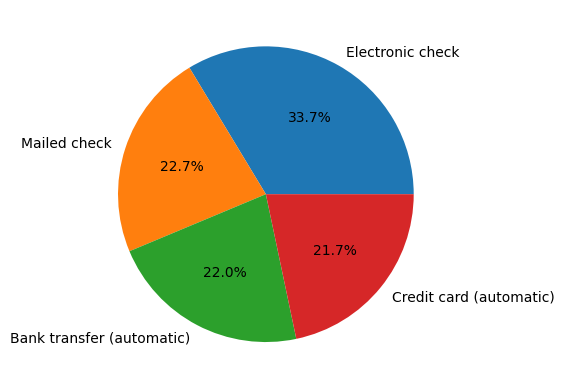

In [842]:
# payment method distribution
churn_counts = df['PaymentMethod'].value_counts(normalize=True) * 100
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
)

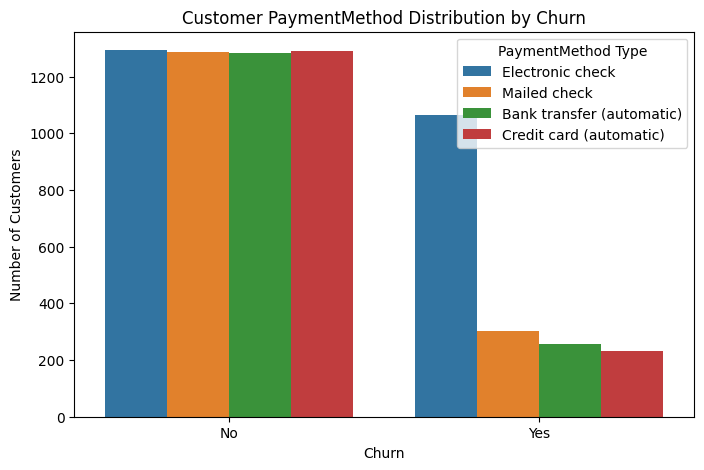

In [843]:
# customer payment distribution and churn relation 
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', hue='PaymentMethod', data=df)
plt.title('Customer PaymentMethod Distribution by Churn')
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.legend(title='PaymentMethod Type')
plt.show()


- Major customers who moved out pay using Electronic Check

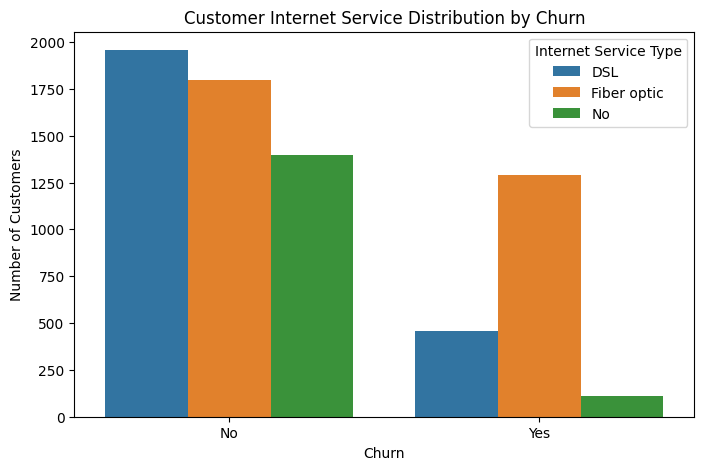

In [844]:
# churn distribution with respect to the internet service
plt.figure(figsize=(8,5))
sns.countplot(x='Churn',hue='InternetService',data=df)
plt.title('Customer Internet Service Distribution by Churn')
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.legend(title='Internet Service Type')
plt.show()

- customer having DSL services are majority and have less churn rate compared to the fiberoptics

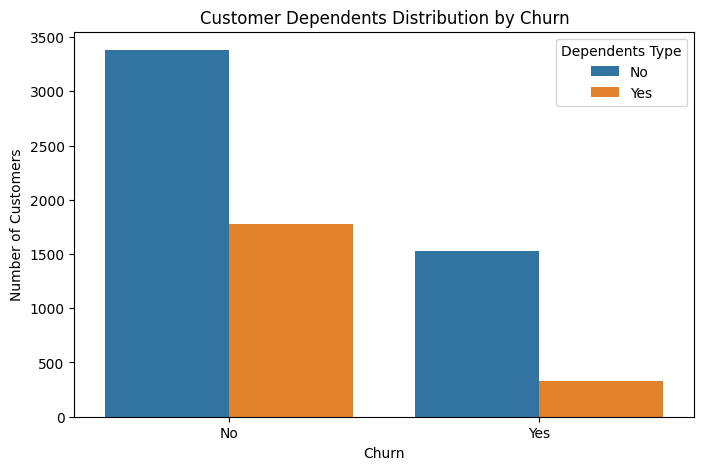

In [845]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn',hue='Dependents',data=df)
plt.title('Customer Dependents Distribution by Churn')
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.legend(title='Dependents Type')
plt.show()

- Customers without dependents are more likely to churn

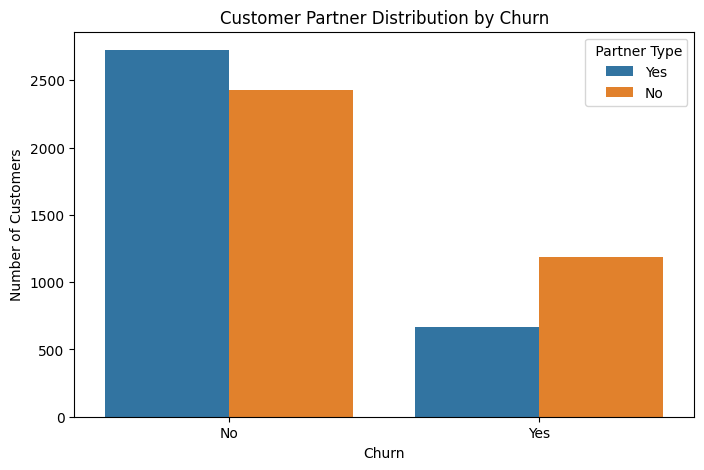

In [846]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn',hue='Partner',data=df)
plt.title('Customer Partner Distribution by Churn')
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.legend(title=' Partner Type')
plt.show()

- customers without partners churn more

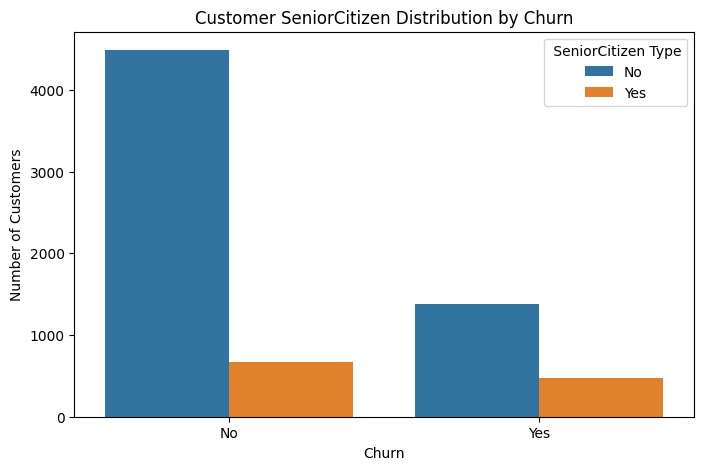

In [847]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn',hue='SeniorCitizen',data=df)
plt.title('Customer SeniorCitizen Distribution by Churn')
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.legend(title=' SeniorCitizen Type')
plt.show()

- the ratio of senior citizens churning is more than that of young .

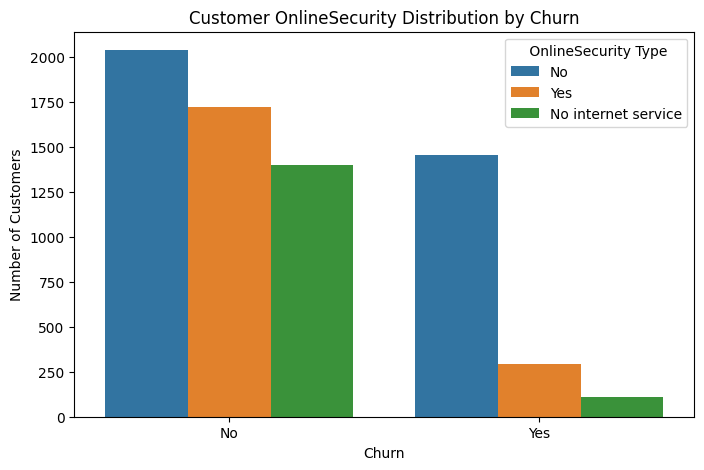

In [848]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn',hue='OnlineSecurity',data=df)
plt.title('Customer OnlineSecurity Distribution by Churn')
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.legend(title=' OnlineSecurity Type')
plt.show()

- Most of the customers churn due to low online security

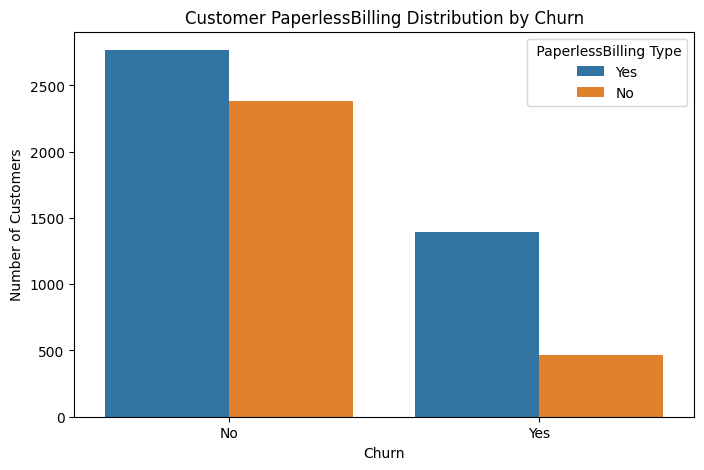

In [849]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn',hue='PaperlessBilling',data=df)
plt.title('Customer PaperlessBilling Distribution by Churn')
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.legend(title=' PaperlessBilling Type')
plt.show()

- Customers with Paperless Billing are more likely to churn

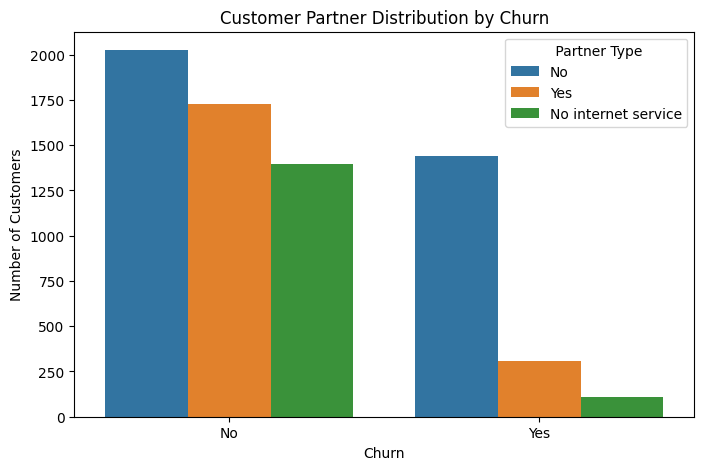

In [850]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn',hue='TechSupport',data=df)
plt.title('Customer Partner Distribution by Churn')
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.legend(title=' Partner Type')
plt.show()

- customers with no tech support churn the most 

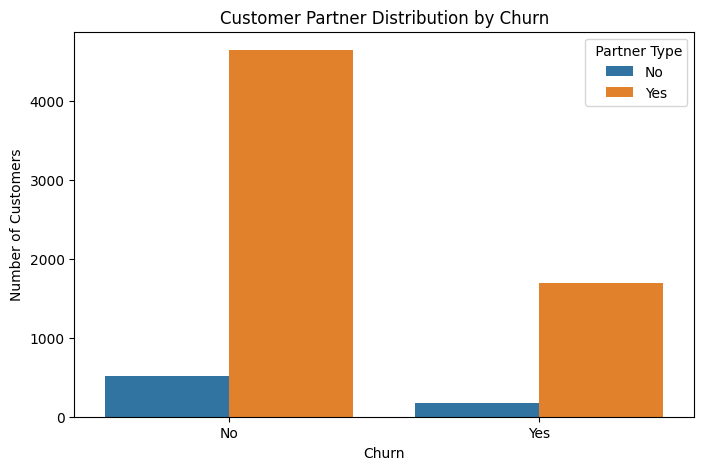

In [851]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn',hue='PhoneService',data=df)
plt.title('Customer Partner Distribution by Churn')
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.legend(title=' Partner Type')
plt.show()

- well a very small fraction of customers are not having phone services and about one third churn 

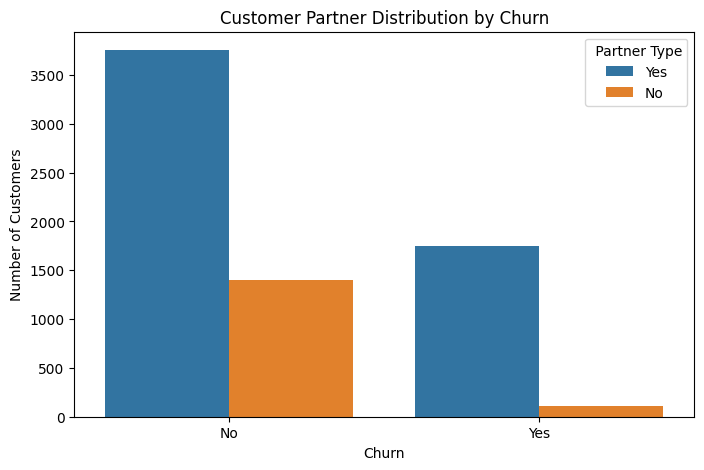

In [852]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn',hue='Internet service',data=df)
plt.title('Customer Partner Distribution by Churn')
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.legend(title=' Partner Type')
plt.show()

- the customers without the internet services churn the least , well they are small in number too , but the amount of lost customers with internet services are more than the amount of customers without internet services lol

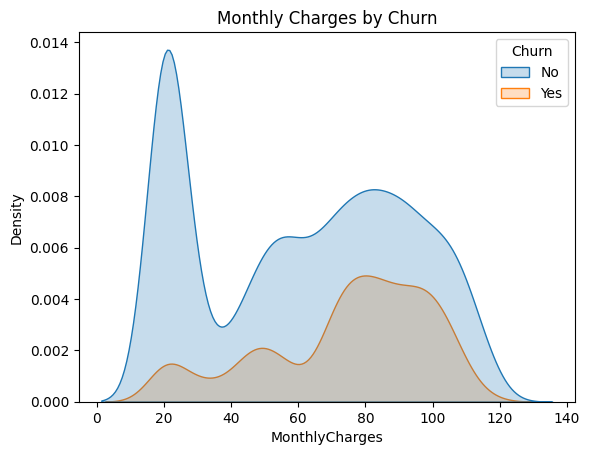

In [853]:
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True)
plt.title("Monthly Charges by Churn")
plt.show()

- customers with higher monthly charge are more likely to churn

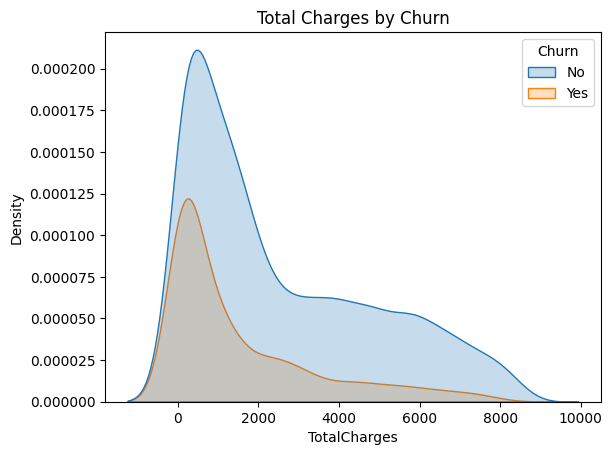

In [854]:
sns.kdeplot(data=df,x="TotalCharges",hue="Churn",fill=True)
plt.title("Total Charges by Churn")
plt.show()

- hmm surprisingly customers with lower total Charges churn the most 

<Axes: xlabel='tenure'>

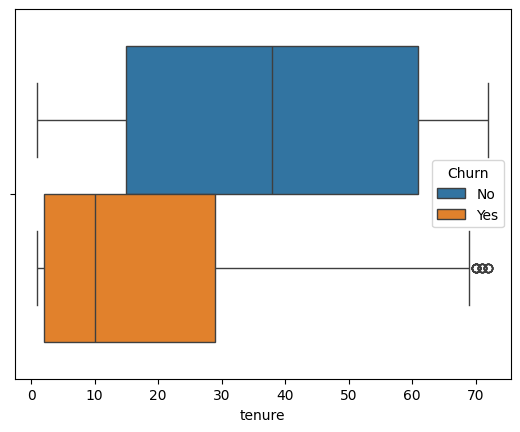

In [855]:
sns.boxplot(data=df,x="tenure",hue='Churn')

low Tenure customers are most likely to churn 

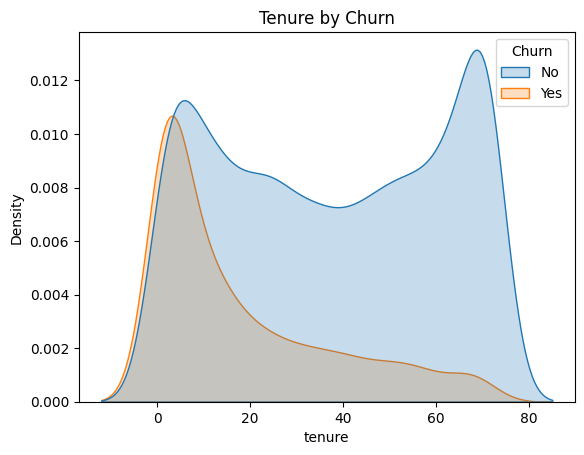

In [856]:
sns.kdeplot(data=df,x="tenure",hue="Churn",fill=True)
plt.title("Tenure by Churn")
plt.show()

# Data Preprocessing

In [857]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   object 
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

In [858]:
from sklearn.preprocessing import LabelEncoder
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [859]:
df = df.apply(lambda x: object_to_int(x)) #type: ignore
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Internet service
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,1
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,1
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,1
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,1
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,1


<Axes: >

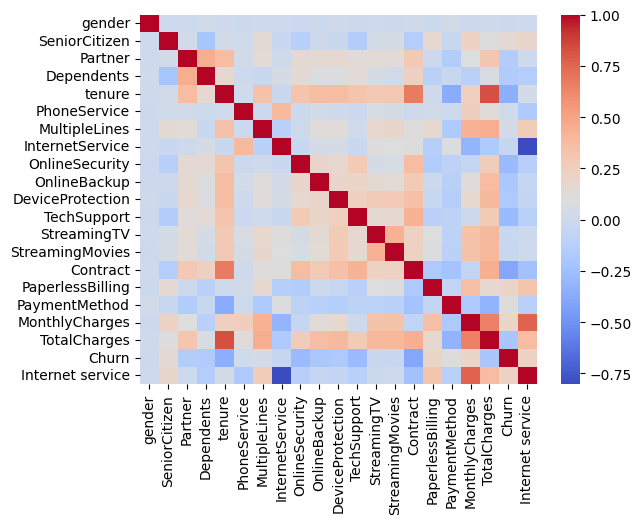

In [860]:
sns.heatmap(df.select_dtypes(include=['number']).corr(),cmap='coolwarm')
# as gender column is string 

In [861]:
X = df.drop(columns=['Churn'])
y = df['Churn'].values

In [862]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [863]:
from sklearn.preprocessing import StandardScaler
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Model Evaluation 

In [864]:
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import accuracy_score

### KNN

In [865]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
accuracy_knn


0.7727056585829767

In [866]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1546
           1       0.61      0.40      0.48       557

    accuracy                           0.77      2103
   macro avg       0.71      0.65      0.67      2103
weighted avg       0.75      0.77      0.76      2103



### SVC

In [867]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_svc = svc.score(X_test,y_test)
accuracy_svc

0.8017118402282454

In [868]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1546
           1       0.69      0.46      0.55       557

    accuracy                           0.80      2103
   macro avg       0.76      0.69      0.71      2103
weighted avg       0.79      0.80      0.79      2103



### Random Forest

In [869]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500 , oob_score=True, n_jobs=-1,random_state=42,max_leaf_nodes=30)
# make predictions 
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.8007608178792202


In [870]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1546
           1       0.69      0.45      0.55       557

    accuracy                           0.80      2103
   macro avg       0.76      0.69      0.71      2103
weighted avg       0.79      0.80      0.79      2103



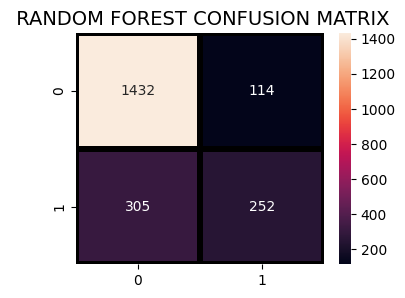

In [871]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

### Logistic Regression

In [872]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.809320019020447


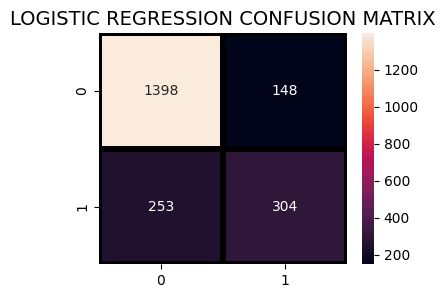

In [873]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [874]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1546
           1       0.67      0.55      0.60       557

    accuracy                           0.81      2103
   macro avg       0.76      0.73      0.74      2103
weighted avg       0.80      0.81      0.80      2103



### Decision Tree

In [875]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.719923918212078


In [876]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1546
           1       0.47      0.47      0.47       557

    accuracy                           0.72      2103
   macro avg       0.64      0.64      0.64      2103
weighted avg       0.72      0.72      0.72      2103



### XgBoost

In [877]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.7788873038516405

### AdaBoost

In [878]:
from sklearn.ensemble import AdaBoostClassifier
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8045649072753209

# Hyper Parameter Tuning 

### KNN

In [879]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],   # uniform = all neighbors equal, distance = closer neighbors more weight
    'metric': ['euclidean', 'manhattan', 'minkowski']  # distance metric
}

grid_knn = GridSearchCV(knn_model,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
random_knn = RandomizedSearchCV(knn_model,param_distributions=param_grid,n_iter=20,cv=5,scoring='accuracy',n_jobs=-1,random_state=42)

# Fit on training data
grid_knn.fit(X_train,y_train)
random_knn.fit(X_train,y_train)

print("Best KNN Parameters:", grid_knn.best_params_)
print("Best KNN Accuracy:", grid_knn.best_score_)
print("Best KNN Parameters (Randomized):", random_knn.best_params_)
print("Best KNN Accuracy (Randomized):", random_knn.best_score_)

best_knn = grid_knn.best_estimator_
print("Test Accuracy (KNN):", best_knn.score(X_test, y_test))
best_knn = random_knn.best_estimator_
print("Test Accuracy (Randomized KNN):", best_knn.score(X_test, y_test))

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}
Best KNN Accuracy: 0.7886690292751691
Best KNN Parameters (Randomized): {'weights': 'uniform', 'n_neighbors': 20, 'metric': 'manhattan'}
Best KNN Accuracy (Randomized): 0.7886690292751691
Test Accuracy (KNN): 0.7936281502615311
Test Accuracy (Randomized KNN): 0.7936281502615311


## SVC

In [881]:
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid_svc = GridSearchCV(
    svc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_svc.fit(X_train, y_train)

print("Best SVC Params (Grid):", grid_svc.best_params_)
print("Best Cross-Validation Accuracy:", grid_svc.best_score_)
print("Test Accuracy:", grid_svc.best_estimator_.score(X_test, y_test))


Best SVC Params (Grid): {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.7958027367227837
Test Accuracy: 0.8045649072753209


## Random Forest

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 500],   # number of trees
    'max_depth': [None, 5, 10, 20],    # depth of each tree
    'min_samples_split': [2, 5, 10],   # min samples to split a node
    'min_samples_leaf': [1, 2, 4],     # min samples at a leaf node
    'max_features': ['sqrt', 'log2']   # how many features to consider at each split
}

rf = RandomForestClassifier(random_state=42)
# Initialize GridSearchCV
grid_rf = GridSearchCV(
    rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

# Results
print("Best Random Forest Params:", grid_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_rf.best_score_)
print("Test Accuracy:", grid_rf.best_estimator_.score(X_test, y_test))


Best Random Forest Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8004922447064491
Test Accuracy: 0.7979077508321446


## Logistic Regression

In [883]:
lr = LogisticRegression(max_iter=1000, random_state=42)
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],   # type of regularization
    'C': [0.01, 0.1, 1, 10, 100],                  # inverse of regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga']       # optimization algorithm
}

# Initialize GridSearchCV
grid_lr = GridSearchCV(
    lr,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best Cross-Validation Accuracy:", grid_lr.best_score_)
print("Test Accuracy:", grid_lr.best_estimator_.score(X_test, y_test))

Best Logistic Regression Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8017115416954728
Test Accuracy: 0.8078934854969092


## Decision Tree

In [884]:
dt = DecisionTreeClassifier(random_state=42)

# Parameter distributions (wider range than grid search)
param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],     # split quality measure
    'max_depth': [None] + list(np.arange(2, 30)),     # depth of tree
    'min_samples_split': np.arange(2, 20),            # min samples for a split
    'min_samples_leaf': np.arange(1, 20),             # min samples at leaf
    'max_features': [None, 'sqrt', 'log2']            # features considered per split
}

random_dt = RandomizedSearchCV(
    dt,
    param_distributions=param_dist,
    n_iter=30,           # try 30 random combos
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_dt.fit(X_train, y_train)

print("Best Decision Tree Params:", random_dt.best_params_)
print("Best Cross-Validation Accuracy:", random_dt.best_score_)
print("Test Accuracy:", random_dt.best_estimator_.score(X_test, y_test))

Best Decision Tree Params: {'min_samples_split': np.int64(11), 'min_samples_leaf': np.int64(11), 'max_features': 'sqrt', 'max_depth': np.int64(8), 'criterion': 'log_loss'}
Best Cross-Validation Accuracy: 0.7850036643268954
Test Accuracy: 0.7912505943889682


# XG boost

In [885]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Parameter distributions
param_dist = {
    'n_estimators': np.arange(100, 600, 100),   # number of trees
    'max_depth': np.arange(3, 15),              # tree depth
    'learning_rate': np.linspace(0.01, 0.3, 10),# step size shrinkage
    'subsample': np.linspace(0.5, 1.0, 6),      # fraction of samples per tree
    'colsample_bytree': np.linspace(0.5, 1.0, 6),# fraction of features per tree
    'gamma': np.linspace(0, 5, 10),             # min loss reduction
    'reg_alpha': np.linspace(0, 1, 10),         # L1 regularization
    'reg_lambda': np.linspace(0, 1, 10)         # L2 regularization
}

random_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=40,           # try 40 random combos
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_xgb.fit(X_train, y_train)

print("Best XGBoost Params:", random_xgb.best_params_)
print("Best Cross-Validation Accuracy:", random_xgb.best_score_)
print("Test Accuracy:", random_xgb.best_estimator_.score(X_test, y_test))

Best XGBoost Params: {'subsample': np.float64(0.7), 'reg_lambda': np.float64(0.8888888888888888), 'reg_alpha': np.float64(0.2222222222222222), 'n_estimators': np.int64(500), 'max_depth': np.int64(6), 'learning_rate': np.float64(0.01), 'gamma': np.float64(1.1111111111111112), 'colsample_bytree': np.float64(1.0)}
Best Cross-Validation Accuracy: 0.8039560197728326
Test Accuracy: 0.8026628625772706


## AdaBoost

In [886]:
ada = AdaBoostClassifier(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 500],     # number of weak learners
    'learning_rate': [0.001, 0.01, 0.1, 1]  # weight applied at each boosting step
}

grid_ada = GridSearchCV(
    ada,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_ada.fit(X_train, y_train)

print("Best AdaBoost Params:", grid_ada.best_params_)
print("Best Cross-Validation Accuracy:", grid_ada.best_score_)
print("Test Accuracy:", grid_ada.best_estimator_.score(X_test, y_test))

Best AdaBoost Params: {'learning_rate': 1, 'n_estimators': 500}
Best Cross-Validation Accuracy: 0.799880831521931
Test Accuracy: 0.8050404184498335


# Choosing the best model

In [889]:
result = []

def store_results(model_name,best_params,best_cv,test_acc):
    result.append({
        'Model': model_name,
        'Best Params': best_params,
        'CV Accuracy': best_cv,
        'Test Accuracy': test_acc
    })

In [890]:
# Logistic Regression
store_results("Logistic Regression", grid_lr.best_params_, grid_lr.best_score_, grid_lr.score(X_test, y_test))

# Decision Tree
store_results("Decision Tree", random_dt.best_params_, random_dt.best_score_, random_dt.score(X_test, y_test))

# Random Forest
store_results("Random Forest", grid_rf.best_params_, grid_rf.best_score_, grid_rf.score(X_test, y_test))

# KNN
store_results("KNN", grid_knn.best_params_, grid_knn.best_score_, grid_knn.score(X_test, y_test))

# SVM
store_results("SVM", grid_svc.best_params_, grid_svc.best_score_, grid_svc.score(X_test, y_test))

# XGBoost (randomized search was used here)
store_results("XGBoost", random_xgb.best_params_, random_xgb.best_score_, random_xgb.score(X_test, y_test))

# AdaBoost
store_results("AdaBoost", grid_ada.best_params_, grid_ada.best_score_, grid_ada.score(X_test, y_test))


In [891]:
result_df = pd.DataFrame(result)
result_df

,Model,Best Params,CV Accuracy,Test Accuracy
0,Logistic Regression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.801712,0.807893
1,Decision Tree,"{'min_samples_split': 11, 'min_samples_leaf': ...",0.785004,0.791251
2,Random Forest,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.800492,0.797908
3,KNN,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.788669,0.793628
4,SVM,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.795803,0.804565
5,XGBoost,"{'subsample': 0.7, 'reg_lambda': 0.88888888888...",0.803956,0.802663
6,AdaBoost,"{'learning_rate': 1, 'n_estimators': 500}",0.799881,0.805040


In [898]:
best_model_row = result_df.loc[result_df['Test Accuracy'].idxmax()]
print("Best Model:\n", best_model_row)

Best Model:
 Model                                          Logistic Regression
Best Params      {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...
CV Accuracy                                               0.801712
Test Accuracy                                             0.807893
Name: 0, dtype: object


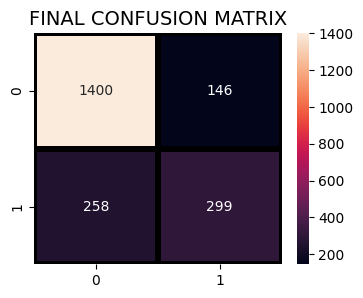

In [899]:
# FINAL CONFUSION MATRIX OF THE BEST MODEL
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,grid_lr.predict(X_test)),annot=True,fmt='d',linecolor='k',linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

- from the confusion matrix we can infer that : There are a total of 1400 + 146 = 1546 of them as non churn and the algorithm pridicts 1400 of them as non churn and 149 of them as churn . Similarly there are a total of 258 + 299 -> 567 actual churn values and the algorithm predicts 237 of them as non churn values and 324 of them as churn values 
- well its almost 50 percent accuracy which is bad !
- lets see what xgboost offers 

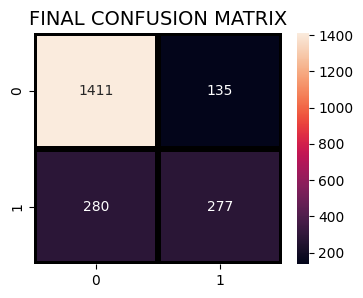

In [900]:
# FINAL CONFUSION MATRIX OF THE BEST MODEL
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,random_xgb.predict(X_test)),annot=True,fmt='d',linecolor='k',linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

- just as bad for churn values
- lets see adaboost

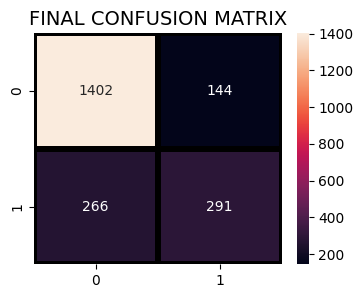

In [901]:
# FINAL CONFUSION MATRIX OF THE BEST MODEL
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,grid_ada.predict(X_test)),annot=True,fmt='d',linecolor='k',linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

- hmm lr is better 

# well thats it focks , my first ml project . adios !